In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\asame\Downloads\Compressed\fetal_health.csv")  

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.89      0.78      0.83        64
         3.0       0.90      0.90      0.90        29

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.90       426
weighted avg       0.95      0.95      0.95       426

Confusion Matrix:
[[328   4   1]
 [ 12  50   2]
 [  1   2  26]]


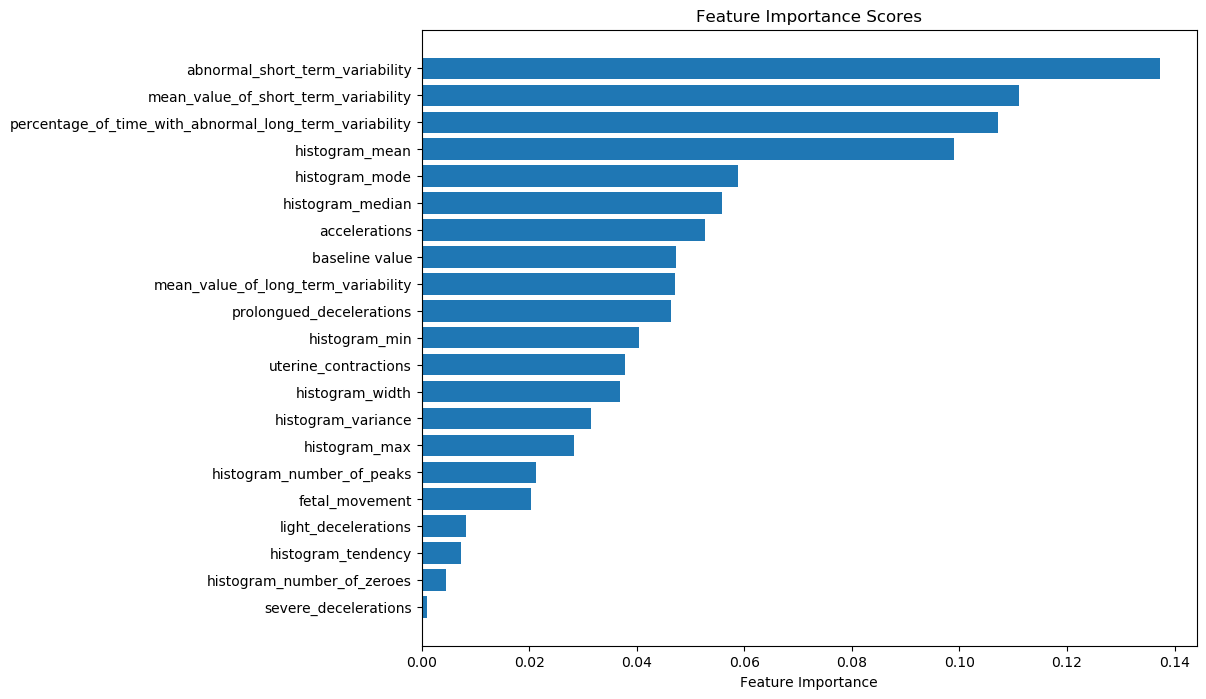

In [4]:

# Split data into features and target variable
X = data.drop('fetal_health', axis=1)
y = data['fetal_health']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importance = best_estimator.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()


In [6]:
import joblib

# Save the trained model to a file
model_filename = 'fetal_health_model.pkl'
joblib.dump(best_estimator, model_filename)
print("Model saved successfully as", model_filename)



Model saved successfully as fetal_health_model.pkl


In [9]:
# Save the trained model to a specified directory
model_path = r'D:\SKAY\Projects\KEEP\VScode\Fetal Health Classification'
model_name = 'fetal_health_model.pkl'
joblib.dump(best_estimator, model_path + model_name)
print("Model saved successfully as", model_filename)

Model saved successfully as fetal_health_model.pkl
